Source codes for Python Machine Learning By Example 4th Edition (Packt Publishing)

Chapter 8 Discovering Underlying Topics in the Newsgroups Dataset with Clustering and Topic Modeling

Author: Yuxi (Hayden) Liu (yuxi.liu.ece@gmail.com)

# Getting started with k-means clustering

## Implementing k-means from scratch

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, 2:4]
y = iris.target

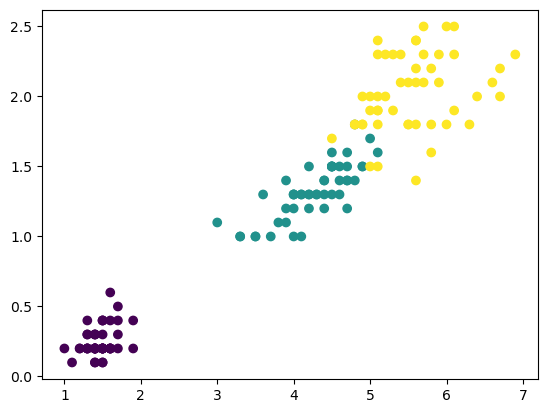

In [2]:
import numpy as np
from matplotlib import pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [3]:
k = 3
np.random.seed(0)
random_index = np.random.choice(range(len(X)), k)
centroids = X[random_index]

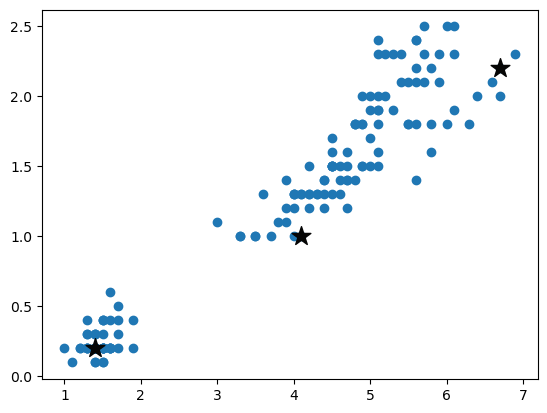

In [4]:
def visualize_centroids(X, centroids):
    plt.scatter(X[:, 0], X[:, 1])
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
    plt.show()

visualize_centroids(X, centroids)

In [5]:
def dist(a, b):
    return np.linalg.norm(a - b, axis=1)

In [6]:
def assign_cluster(x, centroids):
    distances = dist(x, centroids)
    cluster = np.argmin(distances)
    return cluster

In [7]:
def update_centroids(X, centroids, clusters):
    for i in range(k):
        cluster_i = np.where(clusters == i)
        centroids[i] = np.mean(X[cluster_i], axis=0)

In [8]:
tol = 0.0001
max_iter = 100

iter = 0
centroids_diff = 100000
clusters = np.zeros(len(X))


Iteration: 1
Centroids:
 [[1.462      0.246     ]
 [5.80285714 2.11142857]
 [4.42307692 1.44153846]]
Centroids move: 1.0574


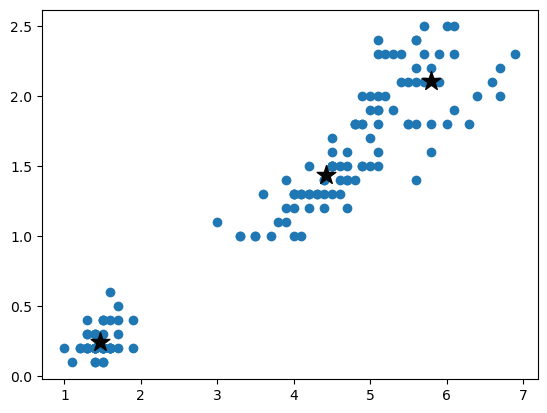

Iteration: 2
Centroids:
 [[1.462      0.246     ]
 [5.73333333 2.09487179]
 [4.37704918 1.40819672]]
Centroids move: 0.0913


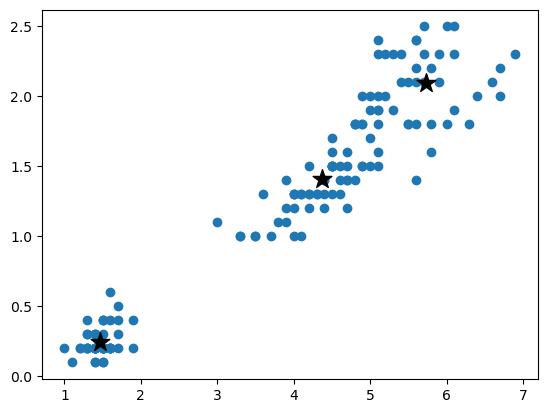

Iteration: 3
Centroids:
 [[1.462      0.246     ]
 [5.68333333 2.08095238]
 [4.34310345 1.38275862]]
Centroids move: 0.0670


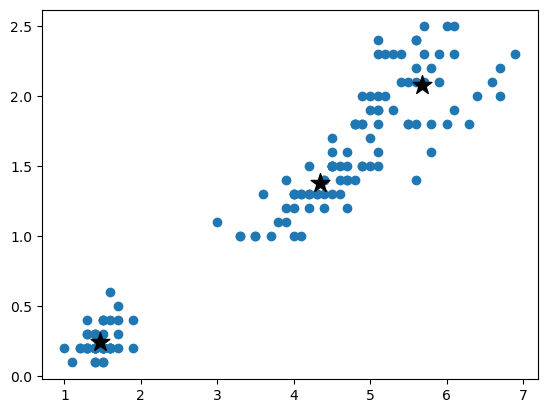

Iteration: 4
Centroids:
 [[1.462      0.246     ]
 [5.65227273 2.06818182]
 [4.31964286 1.36785714]]
Centroids move: 0.0436


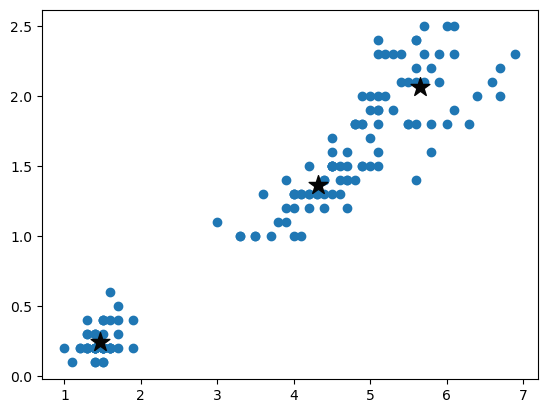

Iteration: 5
Centroids:
 [[1.462      0.246     ]
 [5.63777778 2.06      ]
 [4.30727273 1.36181818]]
Centroids move: 0.0216


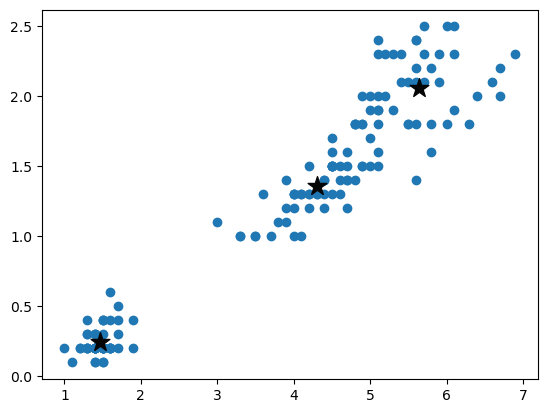

Iteration: 6
Centroids:
 [[1.462      0.246     ]
 [5.62608696 2.04782609]
 [4.29259259 1.35925926]]
Centroids move: 0.0225


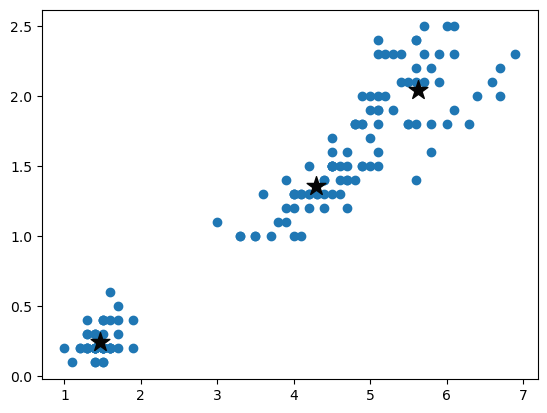

Iteration: 7
Centroids:
 [[1.462      0.246     ]
 [5.62608696 2.04782609]
 [4.29259259 1.35925926]]
Centroids move: 0.0000


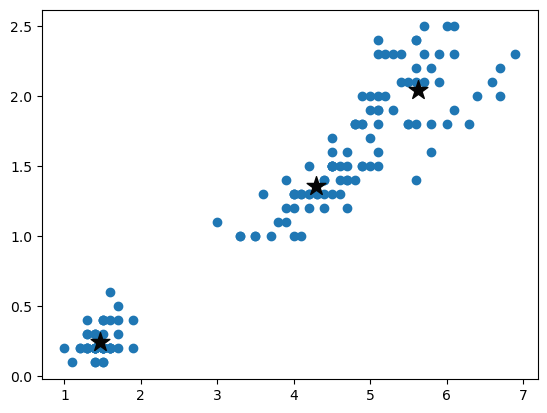

In [9]:
from copy import deepcopy
while iter < max_iter and centroids_diff > tol:
    for i in range(len(X)):
        clusters[i] = assign_cluster(X[i], centroids)
    centroids_prev = deepcopy(centroids)
    update_centroids(X, centroids, clusters)
    iter += 1
    centroids_diff = np.linalg.norm(centroids - centroids_prev)
    print('Iteration:', str(iter))
    print('Centroids:\n', centroids)
    print(f'Centroids move: {centroids_diff:5.4f}')
    visualize_centroids(X, centroids)


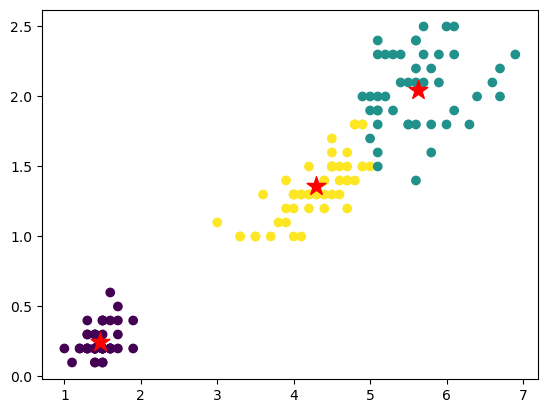

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='r')
plt.show()


## Implementing k-means with scikit-learn

In [11]:
from sklearn.cluster import KMeans
kmeans_sk = KMeans(n_clusters=3, n_init='auto', random_state=42)

In [12]:
kmeans_sk.fit(X)

D:\anaconda3\envs\pyml\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto', random_state=42)

In [13]:
clusters_sk = kmeans_sk.labels_
centroids_sk = kmeans_sk.cluster_centers_

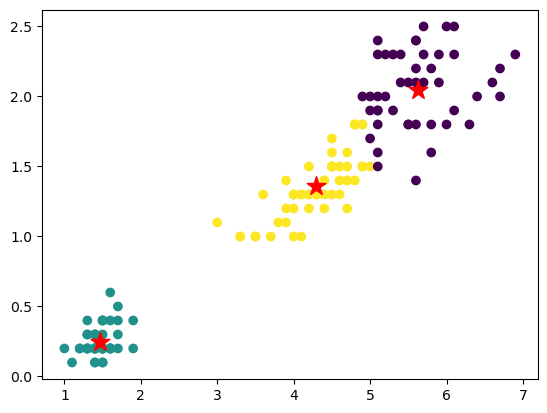

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=clusters_sk)
plt.scatter(centroids_sk[:, 0], centroids_sk[:, 1], marker='*', s=200, c='r')
plt.show()


## Choosing the value of k 

In [15]:
X = iris.data
y = iris.target
k_list = list(range(1, 7))
sse_list = [0] * len(k_list)

In [16]:
for k_ind, k in enumerate(k_list):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(X)
    clusters = kmeans.labels_
    centroids = kmeans.cluster_centers_

    sse = 0
    for i in range(k):
        cluster_i = np.where(clusters == i)

        sse += np.linalg.norm(X[cluster_i] - centroids[i])

    print(f'k={k}, SSE={sse}')
    sse_list[k_ind] = sse

D:\anaconda3\envs\pyml\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\envs\pyml\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\envs\pyml\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k=1, SSE=26.103076447039726
k=2, SSE=16.46977374028119
k=3, SSE=15.12160093100892
k=4, SSE=15.05769253182257
k=5, SSE=14.858930749063735
k=6, SSE=14.883090350867239


D:\anaconda3\envs\pyml\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\envs\pyml\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\envs\pyml\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


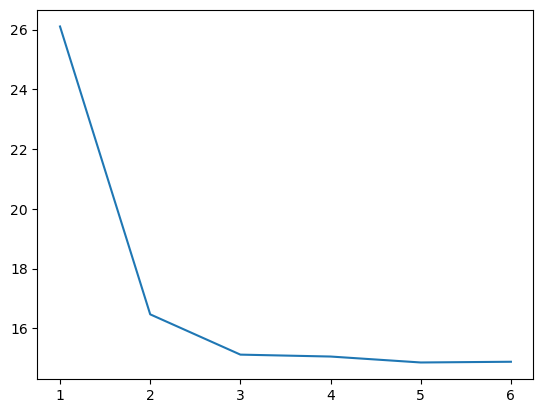

In [17]:
plt.plot(k_list, sse_list)
plt.show()

---

Readers may ignore the next cell.

In [18]:
!jupyter nbconvert --to python ch8_part1.ipynb --TemplateExporter.exclude_input_prompt=True

[NbConvertApp] Converting notebook ch8_part1.ipynb to python
[NbConvertApp] Writing 3023 bytes to ch8_part1.py
